# Autosegmentation in python notebook
- The purpose of this notebook is to build-out the code for a program that can segment out just the kernels from our data regardless of orientation or color balance in the photo.
- To this end I will be experimenting with images 0001 and 9249 becauwe they have opposite orientations and the color balance is quite different(not a techinical term)

In [1]:
#The following code snip-it reads any file from the internet and saves it to your local directory.
from urllib.request import urlopen, urlretrieve
from imageio import imread, imsave
from matplotlib.pylab import plt
import numpy as np
import colorsys
import matplotlib.colors as colors
from plantcv import plantcv as pcv

img9294 = imread('IMG_9294.JPG')
img0001 = imread('IMG_0001.JPG')

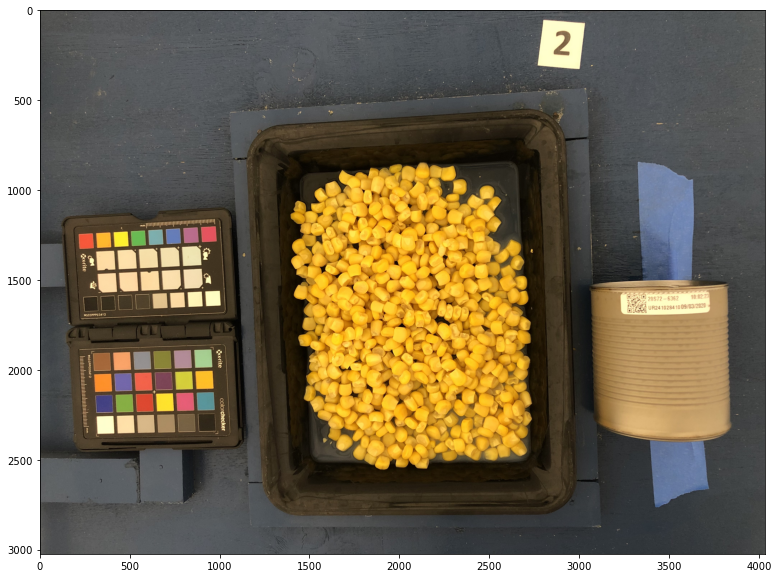

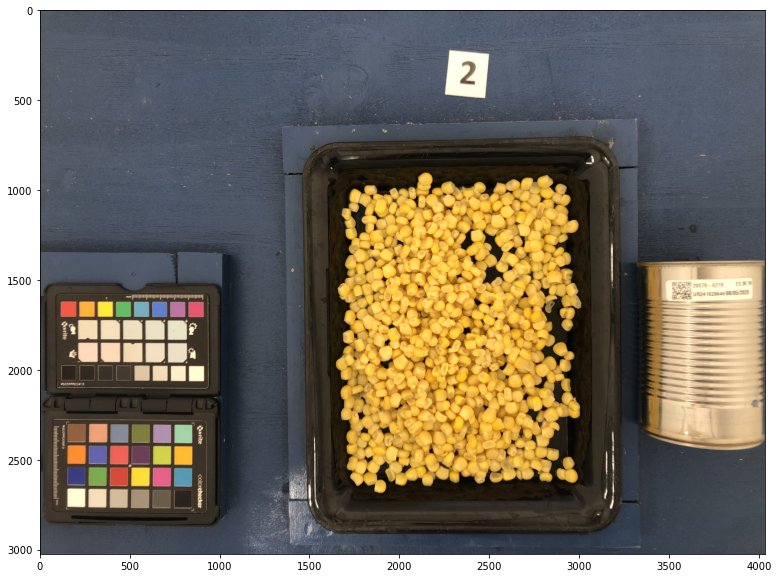

In [2]:
plt.figure(figsize=(20,10));
plt.imshow(img0001)

plt.figure(figsize=(20,10));
plt.imshow(img9294)

In [35]:
hsv1 = colors.rgb_to_hsv(img9294)
hsv2 = colors.rgb_to_hsv(img0001)

In [36]:
hmin= 0.15
hmax= 0.3
smin= 0.05
smax= 0.1
vmin= 250
vmax= 275

In [37]:
h1 = hsv1[:,:,0] > hmin 
h2 = hsv1[:,:,0] < hmax 
s1 = hsv1[:,:,1] > smin
s2 = hsv1[:,:,1] < smax
v1 = hsv1[:,:,2] > vmin
v2 = hsv1[:,:,2] < vmax

binary_image1 = h1 & h2 & s1 & s2 & v1 & v2 

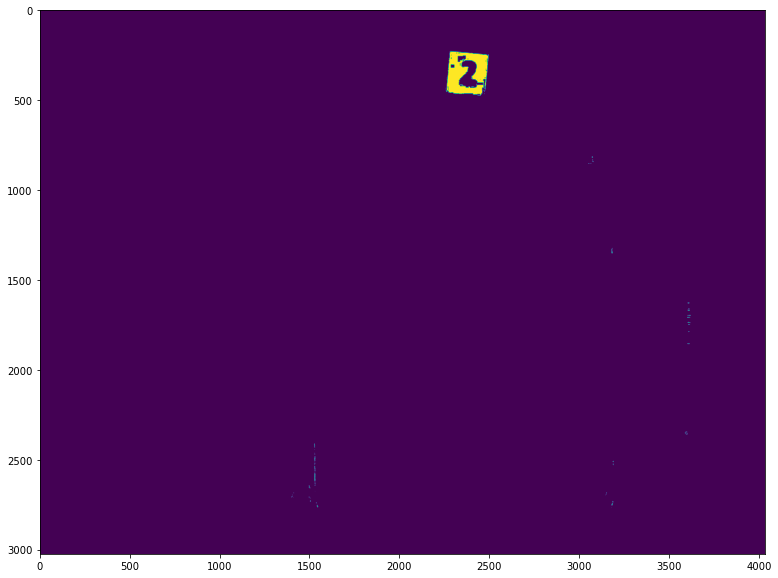

In [38]:
plt.figure(figsize=(20,10));
plt.imshow(binary_image1)

In [39]:
masked = pcv.apply_mask(img = img9294, mask = binary_image1, mask_color='black').astype(np.uint8)

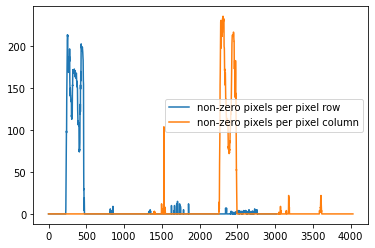

In [40]:
plt.plot(np.sum(binary_image1,axis=1), label = 'non-zero pixels per pixel row')
plt.plot(np.sum(binary_image1,axis=0), label = 'non-zero pixels per pixel column')
plt.legend()

In [41]:
axis_0=np.where(np.sum(binary_image1, axis=0) > 150)
axis_1=np.where(np.sum(binary_image1, axis=1) > 150)

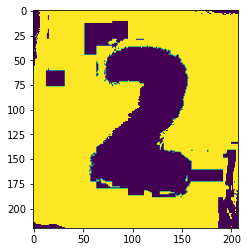

In [42]:
st1=axis_0[0][0]
st2=axis_1[0][0]
en1=axis_0[0][-1]
en2=axis_1[0][-1]
plt.imshow(binary_image1[st2:en2,st1:en1])

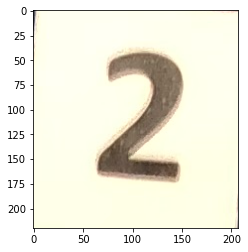

In [43]:
plt.imshow(img9294[st2:en2,st1:en1])

In [44]:
hsv = colors.rgb_to_hsv(img0001)

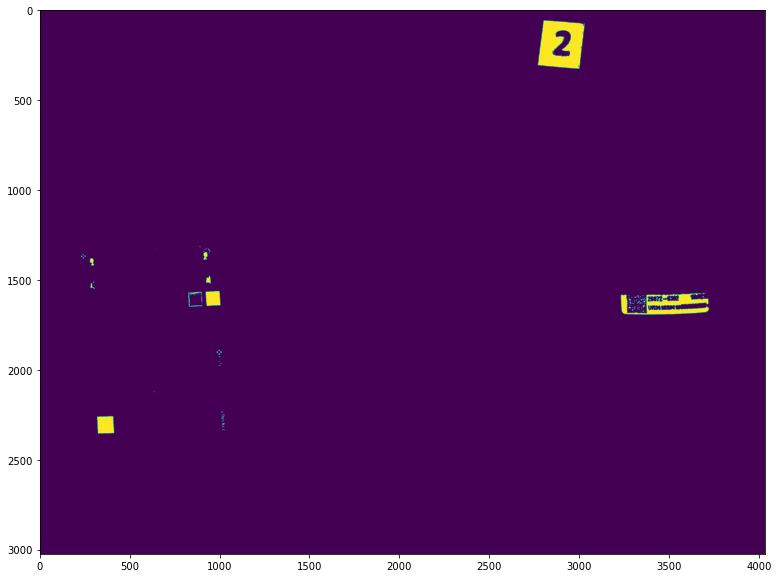

In [45]:
hmin= 0.15
hmax= 0.3
smin= 0.1
smax= 0.5
vmin= 250
vmax= 275
h1 = hsv[:,:,0] > hmin 
h2 = hsv[:,:,0] < hmax 
s1 = hsv[:,:,1] > smin
s2 = hsv[:,:,1] < smax
v1 = hsv[:,:,2] > vmin
v2 = hsv[:,:,2] < vmax


binary_image2 = h1 & h2 & s1 & s2 & v1 & v2 
plt.figure(figsize=(20,10));
plt.imshow(binary_image2)

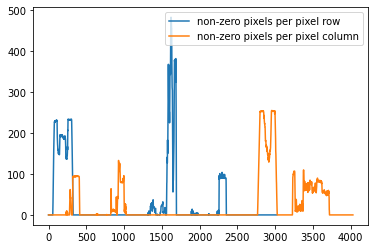

In [46]:
masked = pcv.apply_mask(img = img9294, mask = binary_image, mask_color='black').astype(np.uint8)

plt.plot(np.sum(binary_image2,axis=1), label = 'non-zero pixels per pixel row')
plt.plot(np.sum(binary_image2,axis=0), label = 'non-zero pixels per pixel column')
plt.legend()

axis_0=np.where(np.sum(binary_image2, axis=0) > 150)
axis_1=np.where(np.sum(binary_image2, axis=1) > 150)

st1=axis_0[0][0]
st2=axis_1[0][0]
en1=axis_0[0][-1]
en2=axis_1[0][-1]


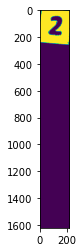

In [47]:
plt.imshow(binary_image2[st2:en2,st1:en1])

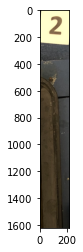

In [48]:
plt.imshow(img0001[st2:en2,st1:en1])